<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_cd.png">

<center><h2 style="font-size:2em;color:#840700">  Pandas - Operaciones y agregaciones  </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/pandas3.png" align="left" style="width:500px"/></td>
<td>

* **Wes McKinney**, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en *AQR Capital* [https://www.aqr.com/] por la necesidad que tenía de una herramienta flexible de alto rendimiento para realizar análisis cuantitativos en datos financieros. 
* Antes de dejar AQR convenció a la administración de la empresa de distribuir esta biblioteca bajo licencia de código abierto.
* **Pandas** es un acrónimo de **PANel DAta analysiS**
   
    
<br>
</td>
</tr>
</table>

# Librerías

Cargando las bibliotecas que necesitamos 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Operaciones de datos en Pandas 

Parte de las características esenciales de **NumPy** es la capacidad de realizar operaciones rápidas de elementos, tanto con aritmética básica (suma, resta, multiplicación, etc.) como con operaciones más sofisticadas (funciones trigonométricas, funciones exponenciales y logarítmicas, etc.).
Pandas hereda gran parte de esta funcionalidad de **NumPy** y las _**ufuncs**_ que fueron presentadas en lecciones pasadas son clave para esto.

Sin embargo, **Pandas** incluye un par de características  extras que serán  útiles: para operaciones de negación y trigonométricas, estas _**ufuncs**_  preservarán las etiquetas de índice y columna en la salida, y para operaciones como la suma y la multiplicación, **Pandas** automáticamente *alineará índices*.
Esto significa que mantener el contexto de los datos y combinar datos de diferentes fuentes, ambas tareas potencialmente propensas a errores con arreglos de **NumPy** sin procesar, se vuelven esencialmente infalibles con **Pandas**.


In [4]:
poblacion = pd.Series({'Belgica':11.3, 'Francia':64.3, 'Alemania':81.3,
                       'Holanda':16.9, 'Inglaterra':64.9,'Argentina':12.1,'Mexico':103.2})

In [5]:
data = {'pais': ['Belgica', 'Francia', 'Alemania', 'Holanda', 'Inglaterra','Argentina','Mexico'],
        'poblacion': [11.3, 64.3, 81.3, 16.9, 64.9, 12.1,103.2],
        'area': [30510, 671308, 357050, 41526, 244820,300163,1960573],
        'capital': ['Bruselas', 'Paris', 'Berlin', 'Amsterdam', 'Londres','Buenos Aires','Ciudad de Mexico']}
paises = pd.DataFrame(data)


In [6]:
#mostrar el dataframe
paises.head()

,pais,poblacion,area,capital
0,Belgica,11.3,30510,Bruselas
1,Francia,64.3,671308,Paris
2,Alemania,81.3,357050,Berlin
3,Holanda,16.9,41526,Amsterdam
4,Inglaterra,64.9,244820,Londres


## Los "nuevos" conceptos


In [7]:
#Encontrar la densidad poblacional en el DataFrame paises
paises["densidad"] = paises["poblacion"]/paises["area"]
paises

,pais,poblacion,area,capital,densidad
0,Belgica,11.3,30510,Bruselas,0.000370
1,Francia,64.3,671308,Paris,0.000096
2,Alemania,81.3,357050,Berlin,0.000228
3,Holanda,16.9,41526,Amsterdam,0.000407
4,Inglaterra,64.9,244820,Londres,0.000265
5,Argentina,12.1,300163,Buenos Aires,0.000040
6,Mexico,103.2,1960573,Ciudad de Mexico,0.000053


In [8]:
#Obtener el logaritmo del valor de la población en el DataFrame countries
np.log(paises["poblacion"])

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
5    2.493205
6    4.636669
Name: poblacion, dtype: float64

In [9]:
#Agregar los valores de la evaluación del logaritmo como una nueva columna "log_poblacion"
paises["log_poblacion"] = np.log(paises["poblacion"])
paises

,pais,poblacion,area,capital,densidad,log_poblacion
0,Belgica,11.3,30510,Bruselas,0.000370,2.424803
1,Francia,64.3,671308,Paris,0.000096,4.163560
2,Alemania,81.3,357050,Berlin,0.000228,4.398146
3,Holanda,16.9,41526,Amsterdam,0.000407,2.827314
4,Inglaterra,64.9,244820,Londres,0.000265,4.172848
5,Argentina,12.1,300163,Buenos Aires,0.000040,2.493205
6,Mexico,103.2,1960573,Ciudad de Mexico,0.000053,4.636669


In [10]:
#Mostrar las columnas del  DataFrame paises
paises.columns

Index(['pais', 'poblacion', 'area', 'capital', 'densidad', 'log_poblacion'], dtype='object')

In [11]:
#Mostrar cuales de ellos tienen una población mayor a los 40 (millones)
paises[paises["poblacion"] > 40]

,pais,poblacion,area,capital,densidad,log_poblacion
1,Francia,64.3,671308,Paris,0.000096,4.163560
2,Alemania,81.3,357050,Berlin,0.000228,4.398146
4,Inglaterra,64.9,244820,Londres,0.000265,4.172848
6,Mexico,103.2,1960573,Ciudad de Mexico,0.000053,4.636669


In [12]:
#Mostrar el dataframe solo con las columnas 'pais'  y 'capital'
paises[["pais", "capital"]]

,pais,capital
0,Belgica,Bruselas
1,Francia,Paris
2,Alemania,Berlin
3,Holanda,Amsterdam
4,Inglaterra,Londres
5,Argentina,Buenos Aires
6,Mexico,Ciudad de Mexico


Cuando requiere de una operación especial en los elementos puede hacerlo con ``apply(OPERACIÓN)``, en donde será necesario definir la  operación a través de la función deseada

In [13]:
# Agregar una columna que indique si el país es pequeño o grande en población (>50). 
# Defina una función llamada etiqueta_poblacion que regrese la etiqueta

def etiqueta_poblacion(a):
    if a > 50:
        return "grande"
    else:
        return "pequeño"

In [14]:
paises["poblacion"].apply(etiqueta_poblacion)

0    pequeño
1     grande
2     grande
3    pequeño
4     grande
5    pequeño
6     grande
Name: poblacion, dtype: object

In [15]:
paises["etiqueta_poblacional"] = paises["poblacion"].apply(etiqueta_poblacion)

In [16]:
#Agregar la columna etiqueta_poblacional con el resultado de aplicar la funcion etiqueta_poblacion
paises

,pais,poblacion,area,capital,densidad,log_poblacion,etiqueta_poblacional
0,Belgica,11.3,30510,Bruselas,0.000370,2.424803,pequeño
1,Francia,64.3,671308,Paris,0.000096,4.163560,grande
2,Alemania,81.3,357050,Berlin,0.000228,4.398146,grande
3,Holanda,16.9,41526,Amsterdam,0.000407,2.827314,pequeño
4,Inglaterra,64.9,244820,Londres,0.000265,4.172848,grande
5,Argentina,12.1,300163,Buenos Aires,0.000040,2.493205,pequeño
6,Mexico,103.2,1960573,Ciudad de Mexico,0.000053,4.636669,grande


## Agregaciones (reducciones)

Pandas proporciona un amplio conjunto de funciones de _**resumen**_ que operan en diferentes tipos de objetos de pandas (DataFrames y Series) y producen un valor único. Cuando se aplica a un *DataFrame*, el resultado se retorna como una Serie de Pandas (un valor para cada columna).

In [17]:
#Utilizando la Serie de poblacion, podemos encontrar su promedio usando mean():
poblacion.mean()

np.float64(50.57142857142857)

In [18]:
#Aplicar la mediana al DataFrame paises
paises.median(numeric_only = True)

poblacion            64.300000
area             300163.000000
densidad              0.000228
log_poblacion         4.163560
dtype: float64

In [19]:
#Podemos encontrar el pais con con area mas pequeña usando min():
paises["area"].min()

np.int64(30510)

La siguiente tabla resume algunas otras agregaciones integradas de Pandas:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

Todos estos son funcionan en *DataFrames* y *Series*.


Hay una función de muy útil, ``describe()`` , que calcula varios parámetros estadísticos  para cada columna y devuelve el resultado.

In [20]:
paises.describe()

,poblacion,area,densidad,log_poblacion
count,7.000000,7.000000e+00,7.000000,7.000000
mean,50.571429,5.151357e+05,0.000208,3.588078
std,37.112115,6.729440e+05,0.000150,0.962601
min,11.300000,3.051000e+04,0.000040,2.424803
25%,14.500000,1.431730e+05,0.000074,2.660260
50%,64.300000,3.001630e+05,0.000228,4.163560
75%,73.100000,5.141790e+05,0.000318,4.285497
max,103.200000,1.960573e+06,0.000407,4.636669


# Ejercicios con los datos del Titanic

Descripción de las columnas :

    Survival - Supervivencia (0 = No; 1 = Si).
    Pclass - Clase (1 = 1st; 2 = 2nd; 3 = 3rd)
    Name - Nombre
    Sex - Sexo
    Age - Edad
    Sibsp - Número de hermanos / cónyuges a bordo
    Parch - Número de padres / niños a bordo
    Ticket - Número de ticket
    Fare - Tarifa
    Cabin - Número de cabina
    Embarked - Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)



In [21]:
#Utilizar el archivo datos/titanic.csv
df = pd.read_csv("datos/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
#muestre las primeras líneas del DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#muestre las ultimas líneas  del DataFrame 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [24]:
#Obtenga el número de filas y columnas
df.shape

(891, 12)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

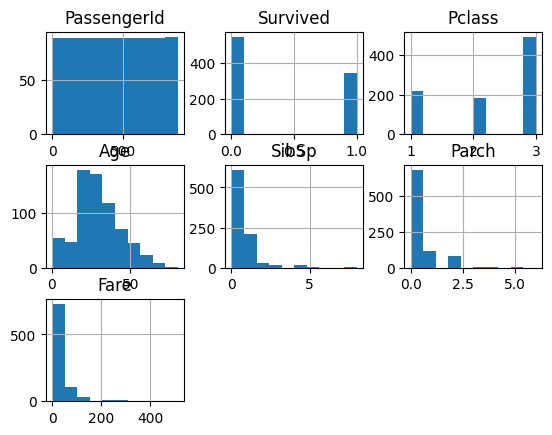

In [25]:
#Muestre los histogramas de las variables numericas 
df.hist()

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Seleccione todas las filas para pasajeros masculinos y calcule la edad media de esos pasajeros. Hacer lo mismo con las pasajeras.</li>
</ul>
</div>

In [26]:

#Utilizar el archivo datos/titanic.csv
df[df["Sex"]=="male"]["Age"].mean()

np.float64(30.72664459161148)

In [27]:

df[df["Sex"]=="female"]["Age"].mean()

np.float64(27.915708812260537)

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>¿Cuántos pasajeros mayores de 70 estaban en el Titanic?</li>
</ul>
</div>

In [31]:
(df["Age"]>70).sum()

np.int64(5)

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>¿Seleccionar los pasajeros que tienen entre 30 y 40 años?</li>
</ul>
</div>

In [29]:
df[(df["Age"]>=30) & (df["Age"]<=40)]     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
